# Assignment 3

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model](https://open.spotify.com/track/4R3AU2pjv8ge2siX1fVbZs?si=b2712f32da0e4358) or a simple [linear regression model](https://scikit-learn.org/stable/modules/linear_model.html)
        - An advanced regressor of your choice (e.g., Random Forest, Neural Network, etc.)

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Assuming that the files `adult.data` and `adult.test` are in `../data/adult/`, then you can use the code below to load them.

In [129]:
import pandas as pd

columns = [
    "coord_x",
    "coord_y",
    "month",
    "day",
    "ffmc",
    "dmc",
    "dc",
    "isi",
    "temp",
    "rh",
    "wind",
    "rain",
    "area",
]
fires_dt = pd.read_csv(
    "../../05_src/data/fires/forestfires.csv", header=None, names=columns
)[1:]
fires_dt

,coord_x,coord_y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
1,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0,0
2,7,4,oct,tue,90.6,35.4,669.1,6.7,18,33,0.9,0,0
3,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0,0
4,8,6,mar,fri,91.7,33.3,77.5,9,8.3,97,4,0.2,0
5,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0,6.44
514,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0,54.29
515,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0,11.16
516,1,4,aug,sat,94.4,146,614.7,11.3,25.6,42,4,0,0


# Get X and Y

Create the features data frame and target data.

In [130]:
X = fires_dt.drop("area", axis=1)
Y = fires_dt["area"]

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [131]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_cols = [
    "coord_x",
    "coord_y",
    "ffmc",
    "dmc",
    "dc",
    "isi",
    "temp",
    "rh",
    "wind",
    "rain",
]
cat_cols = ["month", "day"]


num_transforms = Pipeline(steps=[("scaler", StandardScaler())])

cat_transforms = Pipeline(
    steps=[("onehot", OneHotEncoder(handle_unknown="error", drop=None))]
)


preproc1 = ColumnTransformer(
    transformers=[
        ("num_transforms", num_transforms, num_cols),
        ("cat_transforms", cat_transforms, cat_cols),
    ]
)

preproc1

ColumnTransformer(transformers=[('num_transforms',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('cat_transforms',
                                 Pipeline(steps=[('onehot', OneHotEncoder())]),
                                 ['month', 'day'])])

### Preproc 2

Create preproc1 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

In [132]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
import numpy as np

rain_col = ["rain"]


def binarize_rain(rain):
    return np.where(rain > 0, 1, 0).reshape(-1, 1)


num_transforms = Pipeline(
    steps=[("scaler", StandardScaler()), ("transform", PowerTransformer())]
)

cat_transforms = Pipeline(
    steps=[("onehot", OneHotEncoder(handle_unknown="error", drop=None))]
)


rain_transform = Pipeline(
    steps=[("binarize_rain", FunctionTransformer(binarize_rain, validate=True))]
)


preproc2 = ColumnTransformer(
    transformers=[
        ("num_transforms", num_transforms, num_cols),
        ("rain", rain_transform, rain_col),
        ("cat_transforms", cat_transforms, cat_cols),
    ]
)

preproc2

ColumnTransformer(transformers=[('num_transforms',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('transform',
                                                  PowerTransformer())]),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('rain',
                                 Pipeline(steps=[('binarize_rain',
                                                  FunctionTransformer(func=<function binarize_rain at 0x7a042205e1f0>,
                                                                      validate=True))]),
                                 ['rain']),
                                ('cat_transforms',
                                 Pipeline(steps=[('onehot', OneHotEncoder())]),
                                 ['month', 'day'])])

## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [133]:
# Pipeline A = preproc1 + baseline

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate


baseline_regressor = LinearRegression()

# Advanced regressor
advanced_regressor = RandomForestRegressor(random_state=42)

pipeline_a = Pipeline([("preprocessing", preproc1), ("regressor", baseline_regressor)])
pipeline_a.fit(X_train, Y_train)
cv_results = cross_validate(pipeline_a, X_train, Y_train, return_train_score=True)
cv_results

{'fit_time': array([0.00678515, 0.00496221, 0.00525403, 0.00651288, 0.00545263]),
 'score_time': array([0.00401592, 0.00270915, 0.00226307, 0.00181961, 0.00312352]),
 'test_score': array([-0.05182356, -0.26090731, -1.16138444,         nan,         nan]),
 'train_score': array([0.06089851, 0.06336363, 0.06768455, 0.08939617, 0.05934121])}

In [134]:
# Pipeline B = preproc2 + baseline
# Pipeline B: preproc2 + baseline
pipeline_b = Pipeline([("preprocessing", preproc2), ("regressor", baseline_regressor)])
pipeline_b.fit(X_train, Y_train)
cv_results = cross_validate(pipeline_b, X_train, Y_train, return_train_score=True)
cv_results

{'fit_time': array([0.01777458, 0.01798964, 0.0135684 , 0.0136559 , 0.01511884]),
 'score_time': array([0.00495791, 0.00484157, 0.00531864, 0.00247359, 0.00227857]),
 'test_score': array([-0.03066469, -0.28456066, -0.5100199 ,         nan,         nan]),
 'train_score': array([0.06616544, 0.0734231 , 0.07527324, 0.10395509, 0.06698943])}

In [135]:
# Pipeline C = preproc1 + advanced model
pipeline_c = Pipeline([("preprocessing", preproc1), ("regressor", advanced_regressor)])
pipeline_c.fit(X_train, Y_train)
cv_results = cross_validate(pipeline_c, X_train, Y_train, return_train_score=True)
cv_results

{'fit_time': array([0.13426876, 0.13365293, 0.13051057, 0.13369322, 0.13517809]),
 'score_time': array([0.00493979, 0.0049541 , 0.00736356, 0.00176883, 0.00268435]),
 'test_score': array([-0.75302708, -1.31256961, -2.1101991 ,         nan,         nan]),
 'train_score': array([0.79565912, 0.84615052, 0.84699715, 0.80126566, 0.811026  ])}

In [136]:
# Pipeline D = preproc2 + advanced model
pipeline_d = Pipeline([("preprocessing", preproc2), ("regressor", advanced_regressor)])
pipeline_d.fit(X_train, Y_train)
cv_results = cross_validate(pipeline_d, X_train, Y_train, return_train_score=True)
cv_results

{'fit_time': array([0.13970804, 0.13896251, 0.13924956, 0.14356613, 0.14190102]),
 'score_time': array([0.00501299, 0.00834656, 0.0087204 , 0.00272703, 0.00358438]),
 'test_score': array([-0.84213647, -1.53722318, -1.85427579,         nan,         nan]),
 'train_score': array([0.7996481 , 0.84711807, 0.8397429 , 0.79991827, 0.81426051])}

# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [137]:
from sklearn.model_selection import GridSearchCV
pipeline_a.get_params()

param_grid = {
    "regressor__copy_X": [True, False],
    "regressor__fit_intercept": [True, False]
}
scoring = ['neg_root_mean_squared_error',] 


# Grid Search
grid_cv = GridSearchCV(
    estimator=pipeline_a,
    param_grid=param_grid,
    scoring=scoring,
    refit="neg_root_mean_squared_error",
    return_train_score=True
)

# Fit GridSearchCV
grid_cv.fit(X_train, Y_train)

pd.DataFrame(grid_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__copy_X,param_regressor__fit_intercept,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,...,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_train_neg_root_mean_squared_error,split1_train_neg_root_mean_squared_error,split2_train_neg_root_mean_squared_error,split3_train_neg_root_mean_squared_error,split4_train_neg_root_mean_squared_error,mean_train_neg_root_mean_squared_error,std_train_neg_root_mean_squared_error
0,0.003706,0.000551,0.001782,0.000367,True,True,"{'regressor__copy_X': True, 'regressor__fit_in...",-44.160022,-26.247083,-31.031591,...,NaN,NaN,1,-48.210735,-51.180599,-51.307089,-28.322627,-51.036514,-46.011513,8.919041
1,0.003652,0.000377,0.001516,0.000146,True,False,"{'regressor__copy_X': True, 'regressor__fit_in...",-44.160022,-26.247083,-31.031591,...,NaN,NaN,1,-48.210735,-51.180599,-51.307089,-28.322627,-51.036514,-46.011513,8.919041
2,0.003839,0.000332,0.001606,0.000069,False,True,"{'regressor__copy_X': False, 'regressor__fit_i...",-44.160022,-26.247083,-31.031591,...,NaN,NaN,1,-48.210735,-51.180599,-51.307089,-28.322627,-51.036514,-46.011513,8.919041
3,0.003515,0.000210,0.001557,0.000239,False,False,"{'regressor__copy_X': False, 'regressor__fit_i...",-44.160022,-26.247083,-31.031591,...,NaN,NaN,1,-48.210735,-51.180599,-51.307089,-28.322627,-51.036514,-46.011513,8.919041


In [158]:
pipeline_b.get_params()
param_grid = {
    "regressor__copy_X": [True, False],
    "regressor__positive": [True, False]
}
scoring = ['r2','neg_root_mean_squared_error'] 


# Grid Search
grid_cv = GridSearchCV(
    estimator=pipeline_b,
    param_grid=param_grid,
    scoring=scoring,
    refit="neg_root_mean_squared_error",
    return_train_score=True
)

# Fit GridSearchCV

grid_cv.fit(X_train, Y_train)
grid_cv.best_estimator_

# pd.DataFrame(grid_cv.cv_results_)

In [166]:

pipeline_c.get_params()
param_grid = {
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10, 15],
    'regressor__max_features': [None, 0.1, 0.3, 0.5] 
}
scoring = ['r2','neg_root_mean_squared_error'] 


# Grid Search
grid_cv = GridSearchCV(
    estimator=pipeline_c,
    param_grid=param_grid,
    scoring=scoring,
    refit="neg_root_mean_squared_error",
    return_train_score=True
)

# Fit GridSearchCV
grid_cv.fit(X_train, Y_train)
# save it for later given that this is the best performing model

# Convert to datafram for easier notebook reading 
grid_c = grid_cv
pd.DataFrame(grid_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__max_depth,param_regressor__max_features,param_regressor__min_samples_split,params,split0_test_r2,split1_test_r2,...,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_train_neg_root_mean_squared_error,split1_train_neg_root_mean_squared_error,split2_train_neg_root_mean_squared_error,split3_train_neg_root_mean_squared_error,split4_train_neg_root_mean_squared_error,mean_train_neg_root_mean_squared_error,std_train_neg_root_mean_squared_error
0,0.143391,0.013564,0.005279,0.001477,NaN,NaN,2,"{'regressor__max_depth': None, 'regressor__max...",-0.753027,-1.312570,...,NaN,NaN,1,-22.488740,-20.742824,-20.784792,-13.231383,-22.875256,-20.024599,3.505417
1,0.126182,0.002155,0.005284,0.001454,NaN,NaN,5,"{'regressor__max_depth': None, 'regressor__max...",-0.751828,-0.613031,...,NaN,NaN,1,-26.887782,-30.424185,-29.250098,-17.966151,-29.068949,-26.719433,4.523228
2,0.119671,0.000806,0.005916,0.001506,NaN,NaN,10,"{'regressor__max_depth': None, 'regressor__max...",-0.349419,-0.459289,...,NaN,NaN,1,-37.354817,-34.696142,-31.893038,-21.306795,-32.412272,-31.532613,5.465840
3,0.110362,0.001620,0.004318,0.000593,NaN,NaN,15,"{'regressor__max_depth': None, 'regressor__max...",-0.238081,-0.297331,...,NaN,NaN,1,-43.171469,-43.263233,-38.473259,-24.447264,-37.806354,-37.432316,6.881461
4,0.057203,0.000413,0.004786,0.000910,NaN,0.1,2,"{'regressor__max_depth': None, 'regressor__max...",-0.267787,-1.311838,...,NaN,NaN,1,-20.752037,-19.209242,-19.492501,-12.738084,-20.707942,-18.579961,2.986720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.062612,0.001120,0.004750,0.001143,30.0,0.3,15,"{'regressor__max_depth': 30, 'regressor__max_f...",-0.150184,-0.195387,...,NaN,NaN,1,-42.944886,-42.878369,-43.057084,-24.259014,-40.703147,-38.768500,7.307437
60,0.090745,0.000891,0.005016,0.001086,30.0,0.5,2,"{'regressor__max_depth': 30, 'regressor__max_f...",-0.528054,-1.176192,...,NaN,NaN,1,-21.885584,-20.346064,-20.589640,-13.010230,-21.553974,-19.477098,3.284127
61,0.083692,0.001253,0.004958,0.001113,30.0,0.5,5,"{'regressor__max_depth': 30, 'regressor__max_f...",-0.501696,-0.675208,...,NaN,NaN,1,-29.627847,-31.553063,-30.916732,-18.422424,-32.157914,-28.535596,5.125727
62,0.079931,0.000541,0.004849,0.001416,30.0,0.5,10,"{'regressor__max_depth': 30, 'regressor__max_f...",-0.306150,-0.581370,...,NaN,NaN,1,-37.037378,-35.741890,-38.191549,-21.519114,-35.574301,-33.612846,6.120954


In [140]:

pipeline_d.get_params()
param_grid = {
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10, 15],
    'regressor__max_features': [None, 0.1, 0.3, 0.5] 
}
scoring = ['r2','neg_root_mean_squared_error'] 


# Grid Search
grid_cv = GridSearchCV(
    estimator=pipeline_d,
    param_grid=param_grid,
    scoring=scoring,
    refit="neg_root_mean_squared_error",
    return_train_score=True
)

# Fit GridSearchCV
grid_cv.fit(X_train, Y_train)
pd.DataFrame(grid_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__max_depth,param_regressor__max_features,param_regressor__min_samples_split,params,split0_test_r2,split1_test_r2,...,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_train_neg_root_mean_squared_error,split1_train_neg_root_mean_squared_error,split2_train_neg_root_mean_squared_error,split3_train_neg_root_mean_squared_error,split4_train_neg_root_mean_squared_error,mean_train_neg_root_mean_squared_error,std_train_neg_root_mean_squared_error
0,0.143014,0.001444,0.006612,0.001563,NaN,NaN,2,"{'regressor__max_depth': None, 'regressor__max...",-0.842136,-1.537223,...,NaN,NaN,1,-22.268154,-20.677495,-21.271816,-13.276161,-22.678643,-20.034454,3.452542
1,0.133317,0.001566,0.005589,0.000741,NaN,NaN,5,"{'regressor__max_depth': None, 'regressor__max...",-0.791031,-0.673342,...,NaN,NaN,1,-27.087927,-30.567007,-29.222701,-17.956027,-29.389163,-26.844565,4.583719
2,0.125580,0.000970,0.005942,0.000750,NaN,NaN,10,"{'regressor__max_depth': None, 'regressor__max...",-0.344386,-0.447596,...,NaN,NaN,1,-37.587477,-34.760676,-32.041678,-21.315954,-32.538239,-31.648805,5.525664
3,0.119131,0.001672,0.006492,0.000735,NaN,NaN,15,"{'regressor__max_depth': None, 'regressor__max...",-0.234277,-0.299008,...,NaN,NaN,1,-43.210011,-43.228278,-38.542503,-24.442554,-37.772442,-37.439158,6.885591
4,0.066118,0.000939,0.006716,0.001561,NaN,0.1,2,"{'regressor__max_depth': None, 'regressor__max...",-0.476219,-0.891180,...,NaN,NaN,1,-20.971405,-19.501111,-19.616800,-12.559834,-20.999410,-18.729712,3.150431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.069343,0.001273,0.005539,0.000447,30.0,0.3,15,"{'regressor__max_depth': 30, 'regressor__max_f...",-0.160751,-0.272057,...,NaN,NaN,1,-40.680026,-43.887563,-43.311193,-23.689765,-41.880796,-38.689869,7.583120
60,0.097208,0.001623,0.005966,0.000736,30.0,0.5,2,"{'regressor__max_depth': 30, 'regressor__max_f...",-0.542366,-1.530713,...,NaN,NaN,1,-21.772023,-20.306416,-20.258063,-13.078921,-21.554065,-19.393897,3.218080
61,0.091409,0.001641,0.005751,0.001414,30.0,0.5,5,"{'regressor__max_depth': 30, 'regressor__max_f...",-0.344674,-0.832926,...,NaN,NaN,1,-30.690813,-32.588569,-30.473627,-17.641326,-32.005028,-28.679873,5.575760
62,0.086121,0.000918,0.005219,0.000248,30.0,0.5,10,"{'regressor__max_depth': 30, 'regressor__max_f...",-0.259638,-0.531379,...,NaN,NaN,1,-37.013264,-37.645377,-35.697496,-21.398828,-35.020584,-33.355110,6.049822


# Evaluate

+ Which model has the best performance?

Looks like C has the best performance.

# Export

+ Save the best performing model to a pickle file.

In [150]:

import pickle

with open('best_model.pkl', 'wb') as f:
    pickle.dump(grid_c.best_estimator_, f)

# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

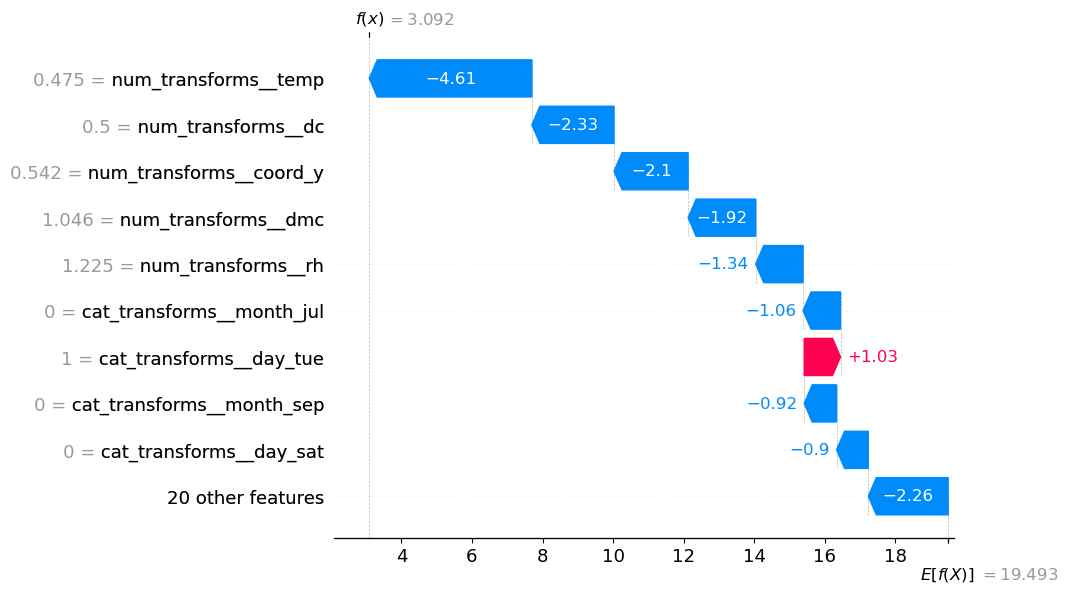

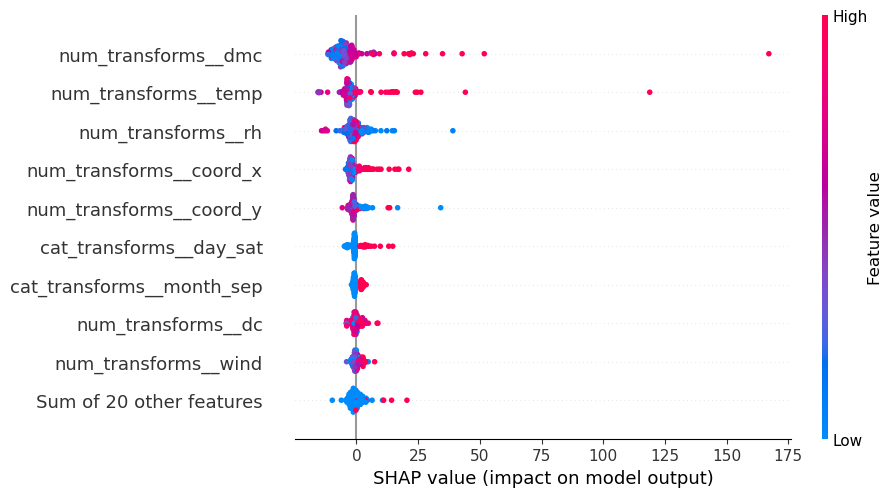

In [165]:
import shap


grid_c_model = grid_c.best_estimator_
grid_c_model.named_steps
data_transform = grid_c_model.named_steps["preprocessing"].transform(X_test)

explainer = shap.Explainer(
    grid_c_model.named_steps["regressor"],
    data_transform,
    feature_names=grid_c_model.named_steps["preprocessing"].get_feature_names_out(),
)

shap_values = explainer(data_transform, check_additivity=False)

# specific observation
shap.plots.waterfall(shap_values[1])
shap.plots.beeswarm(shap_values)

Temps are the largest explainer. DMC would be the next one, albeit in a somewhat distant second. dc and month seems to be the least useful.


I'd argue for dropping dc and month as they're quite clustered around the zero value. dms, temp, and rh should definitely be kept as priorities though.


## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.